# Data and Library Import

In [ ]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
from datetime import datetime


import re 
import string
import nltk
#Download English Stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords_ENG = stopwords.words('english')

In [2]:
# Read data from files
path = './new-york-city-airbnb-open-data/AB_NYC_2019.csv'
headnum = 1 # Change it according to the real case
separater = ',' # Sometimes it's ';'
# CSV file
df = pd.read_csv(path,sep=separater) # add this code when you don't want certain columns: usecols = lambda x: x not in ['', ''] 

df.head() #view first few columns of data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [10]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [8]:
# check if the dataframe has duplicated rows(can limit to specific columns if you want)
print('There are {} duplicated rows'.format(df.duplicated().sum()))

There are 0 duplicated rows


# Exploratory Data Analysis

In [11]:
print("Notebook to show EDA work")

Notebook to show EDA work


name                               0.03%
host_id                            0.00%
host_name                          0.04%
neighbourhood_group                0.00%
neighbourhood                      0.00%
latitude                           0.00%
longitude                          0.00%
room_type                          0.00%
price                              0.00%
minimum_nights                     0.00%
number_of_reviews                  0.00%
last_review                       20.56%
reviews_per_month                 20.56%
calculated_host_listings_count     0.00%
availability_365                   0.00%


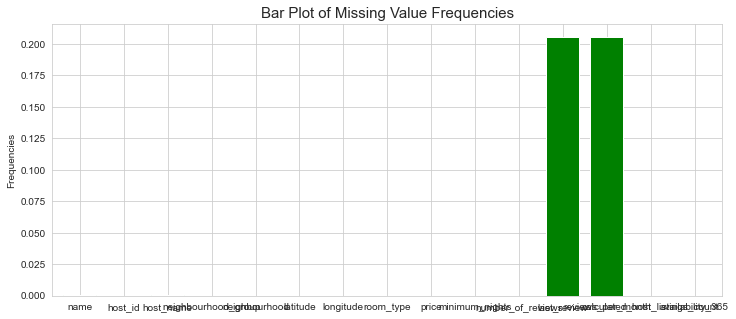

In [ ]:
#count missing value and visualise
def missing_value(df):

  ''' Function to better visualize the the percentage of missing values 
  '''
  df_miss_num = df.iloc[:, 1:].isnull().sum()
  df_total_num = df.shape[0]
  df_miss_freq = df_miss_num / df_total_num
  print(df_miss_freq.apply(lambda x: format(x, '.2%')).to_string())

  plt.figure(figsize=(12, 5))
  df_miss_freq.plot.bar(width=0.75, rot=0, ax=plt.gca(), color = 'green')
  plt.ylabel('Frequencies')
  plt.title('Bar Plot of Missing Value Frequencies', fontsize=15)
  plt.show()

missing_value(df)

last review & reviews per month have 20% missing data

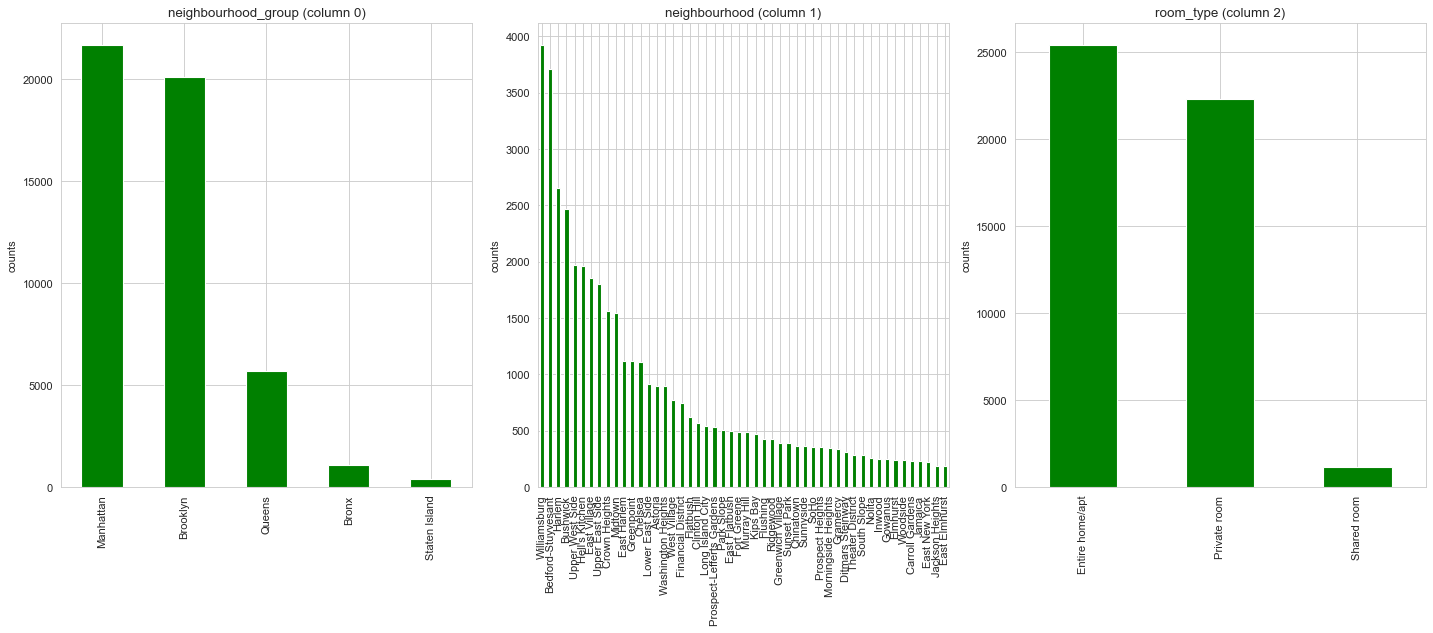

In [ ]:
# Plot the distribution of the values in certain column (categorical columns)
cat_features = ['neighbourhood_group','neighbourhood','room_type']

def plot_density_per_cat_column(df, nGraphShown, nGraphPerRow,cat_features):
    ''' Function to plot the distribution of categorical variables
    '''
    nunique = df.nunique()
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k') # white/black
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            # To increase the readibility, only show top 50 results here
            valueCounts = columnDf.value_counts().head(50)
            valueCounts.plot.bar(color = 'green')
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
df_cat = df[cat_features]
plot_density_per_cat_column(df_cat, 3, 3,cat_features)

Listings seem to be focused in specific locations and not many occur in shared spaces

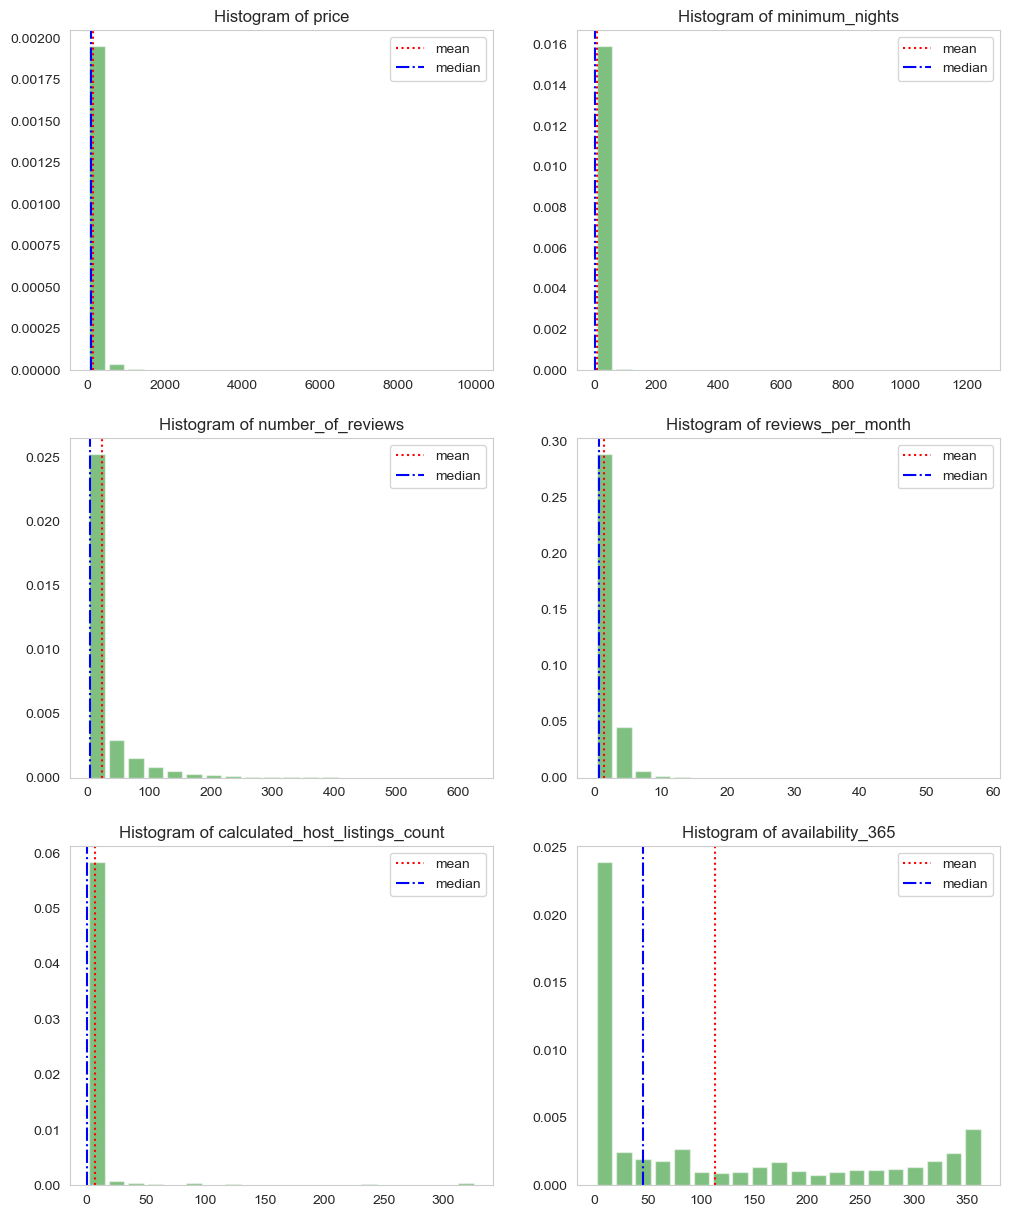

In [4]:
num_features = ['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']
def plot_density_per_num_column(df,numerical_features):
  '''Function to plot the distribution of numerical features
  '''
  cols = 2
  rows = int(np.ceil(len(num_features)/cols))

  fig = plt.figure(figsize=(6*cols,5*rows))
  for i, fea_name in enumerate(numerical_features):
    ax = fig.add_subplot(rows,cols,i+1)
    df.loc[:,fea_name].hist(color='green',alpha=0.5,rwidth=0.8, density=True,
                            grid=False,ax=ax, bins=20)
    plt.axvline(df.loc[:,fea_name].mean(), 
                color='r',linestyle=':',label = 'mean')
    plt.axvline(df.loc[:,fea_name].median(), color='b', linestyle='-.', 
                label = 'median')
    plt.legend()
    #df.loc[:,fea_name].plot(kind='density', color='green')
    ax.set_title("Histogram of " + fea_name)
    
  plt.show()
plot_density_per_num_column(df,num_features)

It is difficult to visualize distribution with due to the impact of outliers

In [5]:
# Define functions to remove the outliers
def remove_outliers(df, column):
    '''Function to remove outliers from the numerical features to ensure better visualize
    the distribution of features.
    '''

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] > lower_bound) & (df[column] < upper_bound)]
df_no_outliers = df.copy()

for columnname in num_features:
  df_no_outliers = remove_outliers(df_no_outliers,columnname)

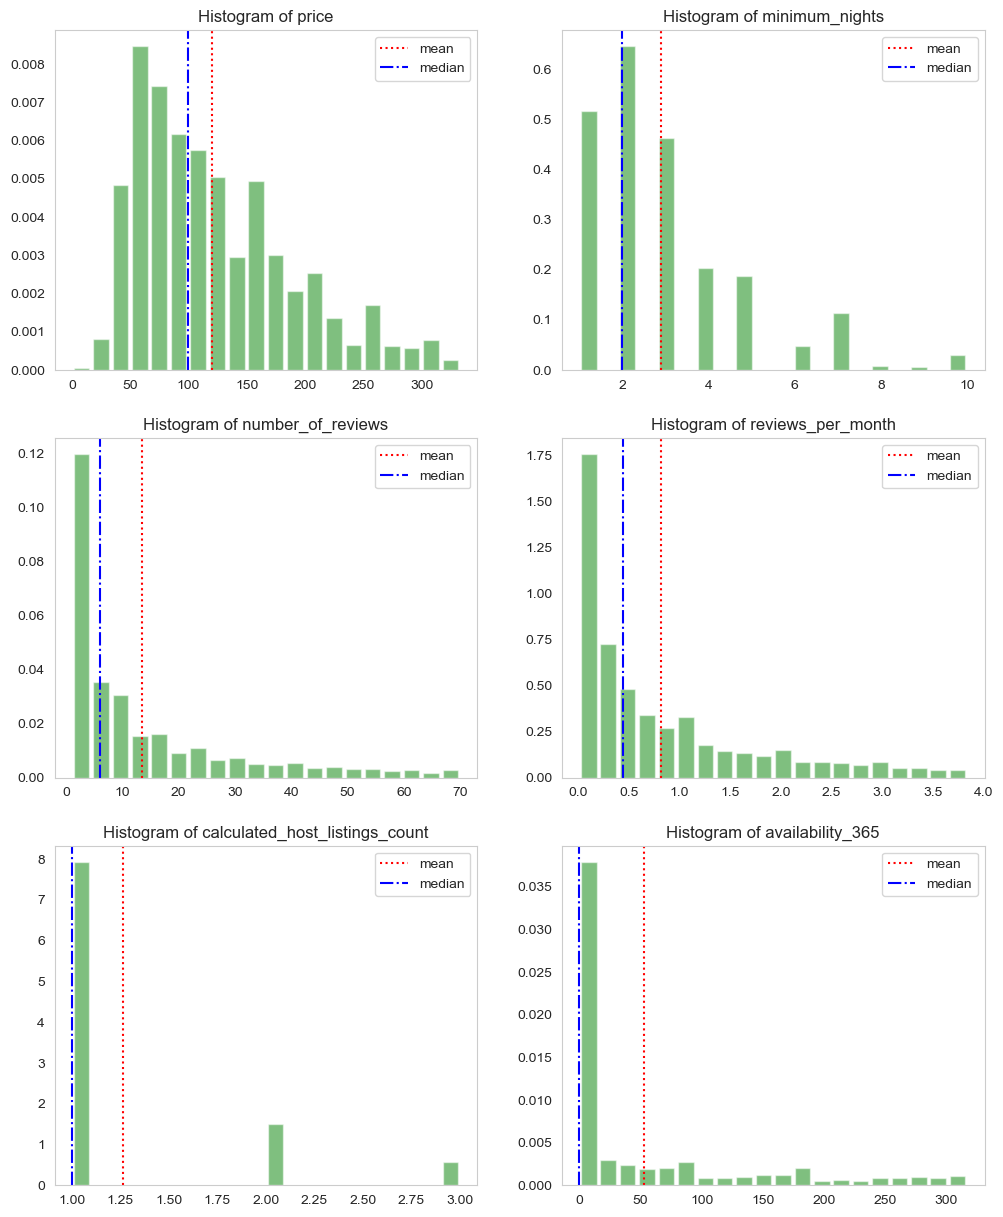

In [6]:
plot_density_per_num_column(df_no_outliers,num_features)

The distribution of numerical listing are all right skewed. It could be interesting to explore the impact techniques such as Boxcox or taking the log of the data to improve distribution

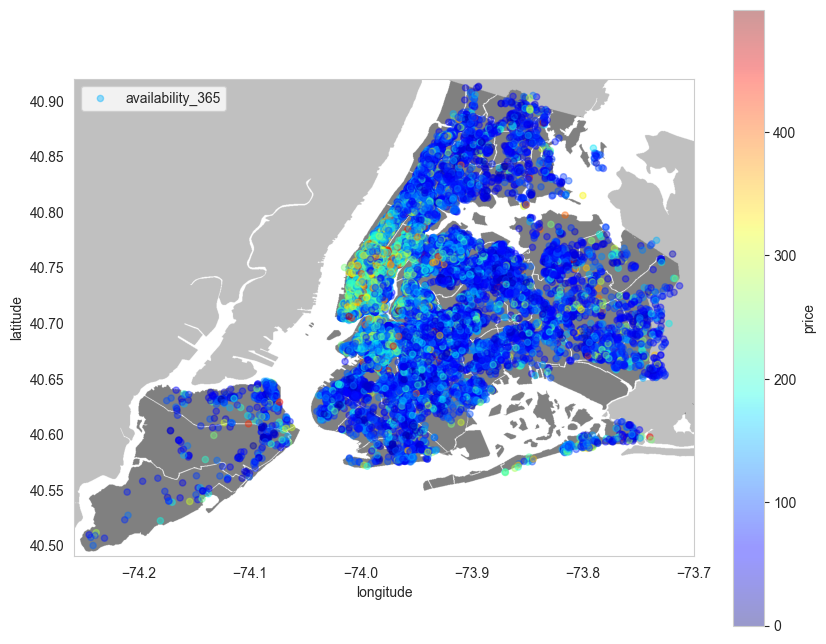

In [6]:
def plot_nyc_price_map(df):

  '''Plot the listings of in nyc to get a better idea of the geolocation of expensive listings.
  the price is limited to 500 as to not allow outliers to skew the scale of price color bar.
  '''
  #initializing the figure size
  plt.figure(figsize=(10,8))
  #import image
  nyc_img=plt.imread("new-york-city-airbnb-open-data/Neighbourhoods_New_York_City_Map.png")
  #scaling the image based on the latitude and longitude max and mins for proper output
  plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
  ax=plt.gca()
  #using scatterplot again
  df[df['price'] < 500].plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
            cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5, grid = False)

  plt.legend()
  plt.show()

plot_nyc_price_map(df)

Listings in Manhattan are more expensive (as expected) however we we can also visualize listings outside of central new york with expensive listings. Possible explanations could be quality of the listing, size of the listing, popularity of host, or proximity of lsiting to public transportation or important NYC landmarks

In [3]:
def clean_string(line,stopwords): 

  '''Function to clean text in "name" column to remove common stop words and remove punctuation 
  and other irrelevant information
  '''


  line = re.sub(r'[^\w\s]',"",line) #removes punctuation
  line = [word.lower() for word in line.split(" ") if (len(word)>0) & (word.lower() not in stopwords)] #Each lines is then split into words
  #by parsing blank space. any word that is a stop word is remove and then lower case for better gouping.

  return ' '.join(line) # the output is list of words due to the parsing operation

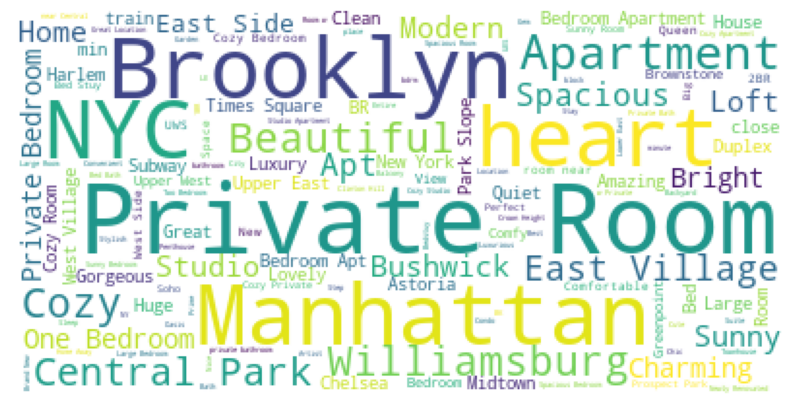

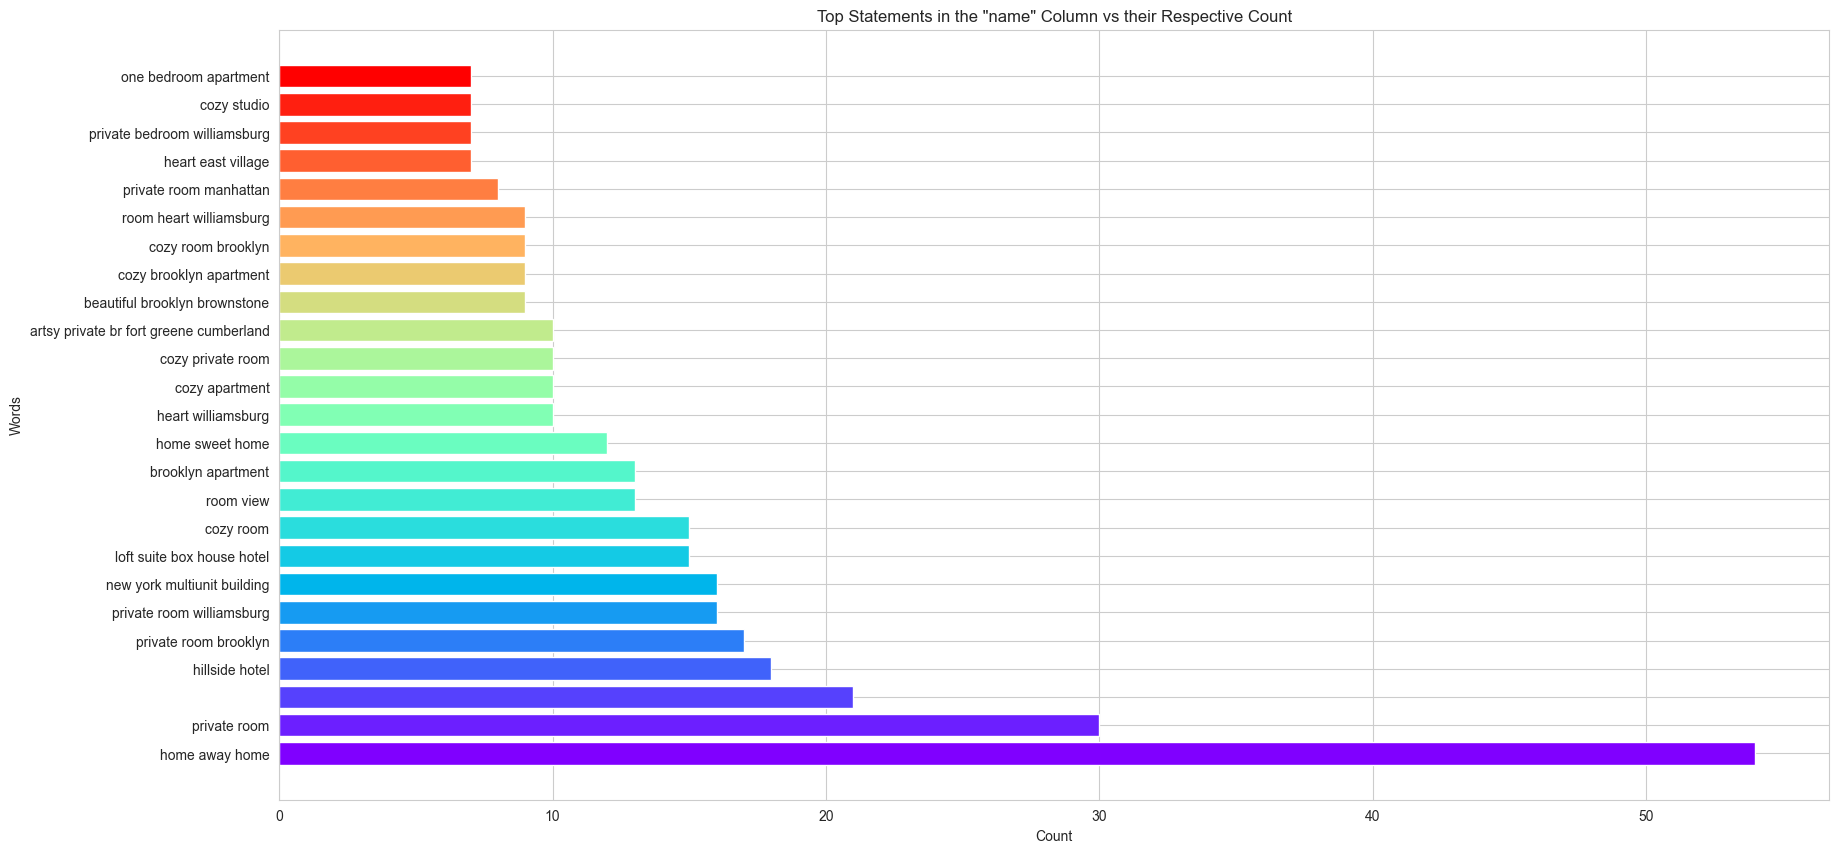

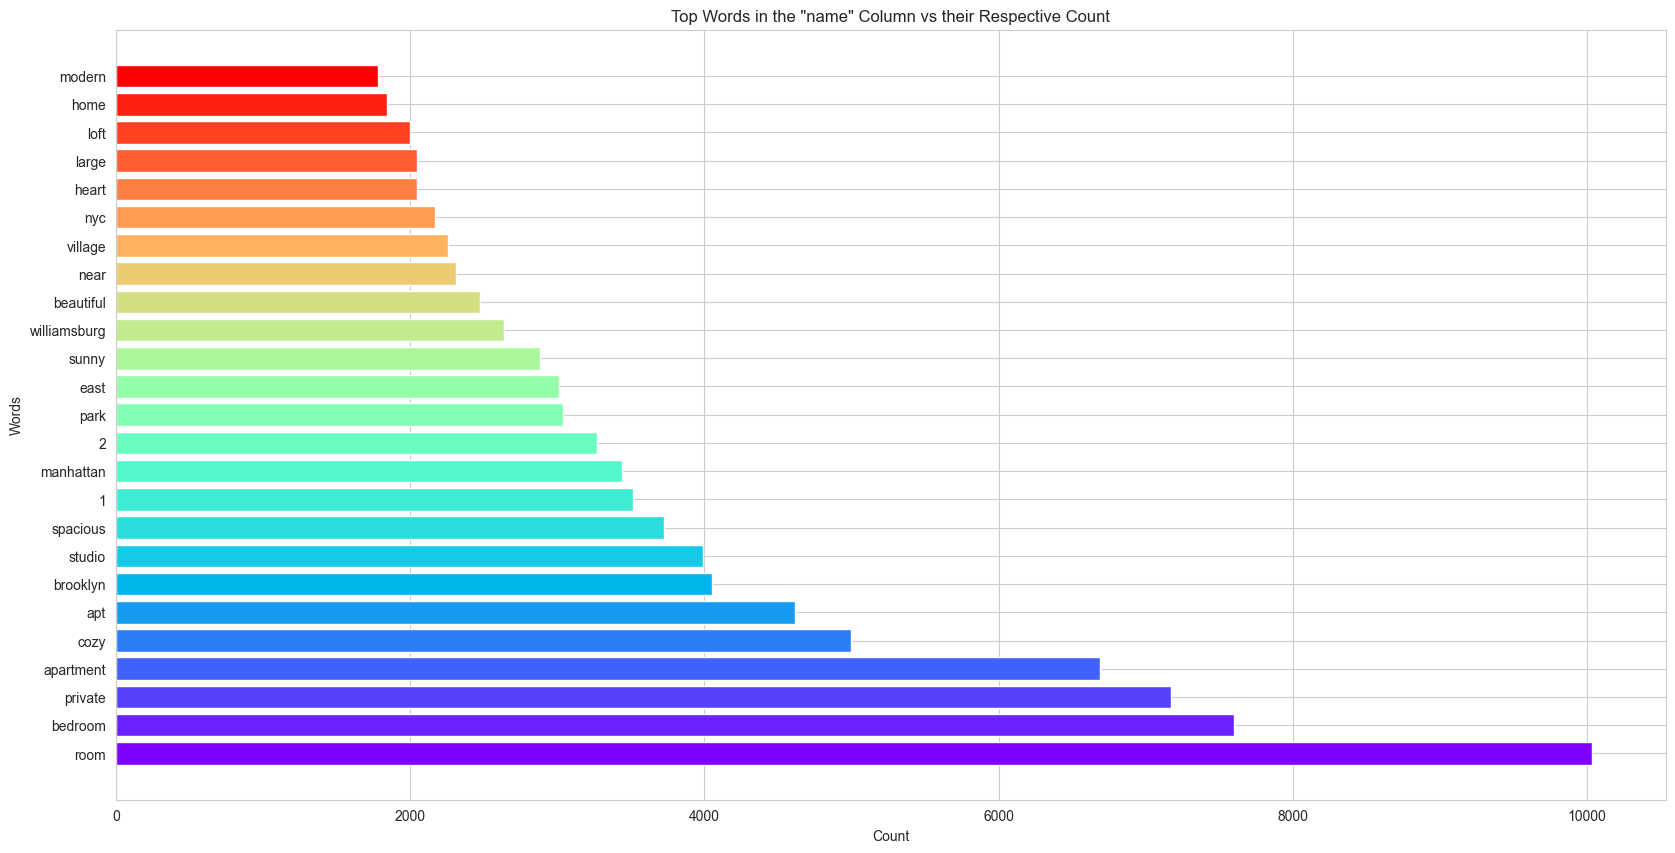

In [4]:
def plot_word_cloud(df_with_name,stopwords):
    '''Plot word  cloud of frequent occuring words in "name" column along
    along with a bar graph distribution of the 25 most common words and their
    respective counts
    '''

    import collections
    import matplotlib.cm as cm
    import matplotlib.pyplot as plt
    from matplotlib import rcParams
    from wordcloud import WordCloud

    df_with_name[df_with_name.name.isna()] = '' #replacing na values with empty spaces to process wordcloud

    #Plot word cloud
    wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=1000).generate(' '.join(df_with_name.name))
    rcParams['figure.figsize'] = 10, 20
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    #clean listing statements 
    filtered_statements = [clean_string(text,stopwords) for text in list(df_with_name['name'])]

    #retrieve words from the listing statements
    filtered_words = [item for sublist in filtered_statements for item in sublist.split(" ")]

    #find the counts of statements and words
    counted_statements = collections.Counter(filtered_statements)
    counted_words = collections.Counter(filtered_words)

    #Plot top 25 statements in listings
    words = []
    counts = []
    for letter, count in counted_statements.most_common(25):
        words.append(letter)
        counts.append(count)
    colors = cm.rainbow(np.linspace(0, 1, 25))
    rcParams['figure.figsize'] = 20, 10
    plt.title('Top Statements in the "name" Column vs their Respective Count')
    plt.xlabel('Count')
    plt.ylabel('Words')
    plt.barh(words, counts, color=colors)
    plt.show()

    #Plot top 25 words in listings
    words = []
    counts = []
    for letter, count in counted_words.most_common(25):
        words.append(letter)
        counts.append(count)
    colors = cm.rainbow(np.linspace(0, 1, 25))
    rcParams['figure.figsize'] = 20, 10
    plt.title('Top Words in the "name" Column vs their Respective Count')
    plt.xlabel('Count')
    plt.ylabel('Words')
    plt.barh(words, counts, color=colors)
    plt.show()

plot_word_cloud(df,stopwords_ENG)

"home away from home" seems to be a common phrasing in listing for the nyc area whereas room is the most common word. It could be interesting to create a bag of words as some wordings such as "2 bedroom", "spacious", "modern" could have an impact of the pricing of the listing

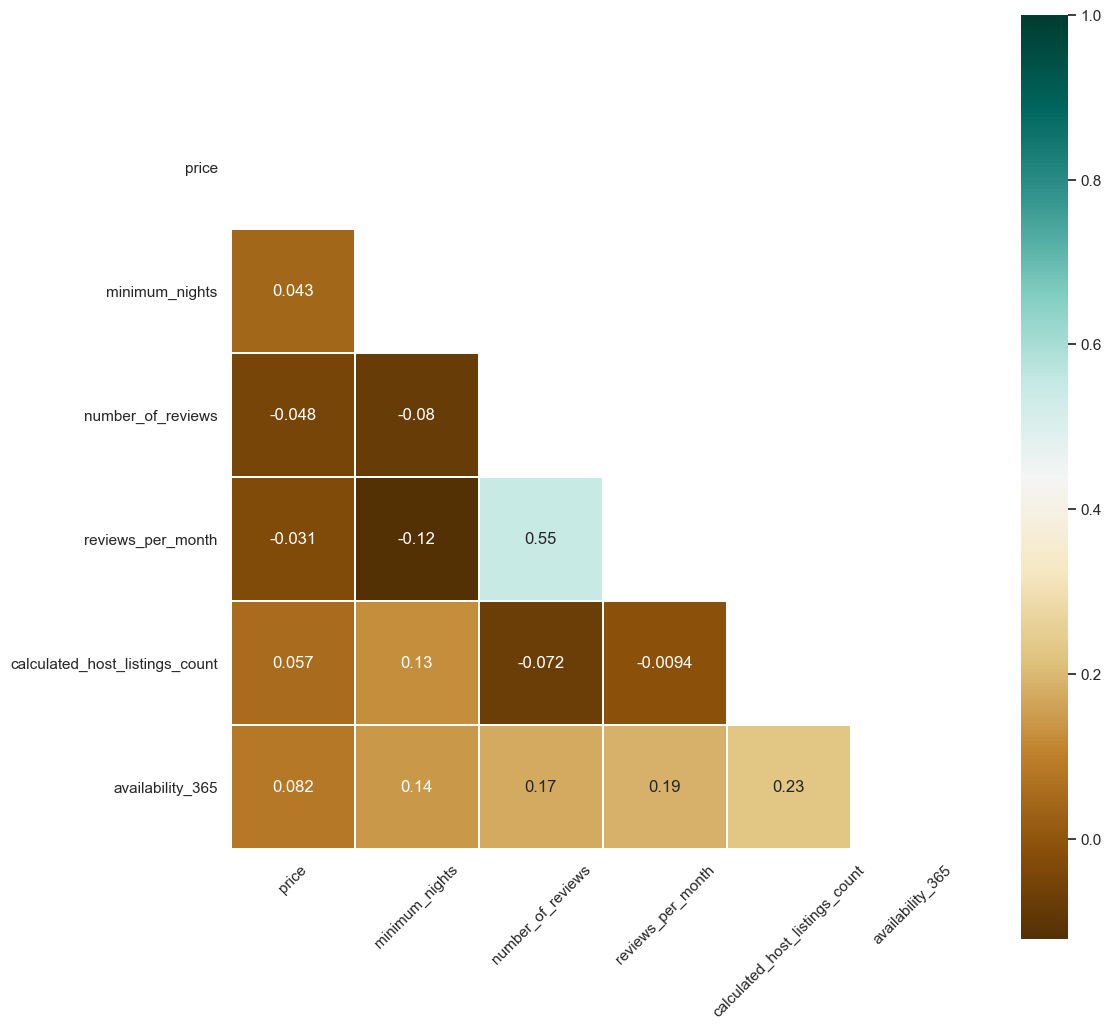

In [7]:
def plot_heat_map(df,num_features):

  '''Function to plot heatmap and review any colinearity between features
  '''
  sns.set(style='white',context='notebook',palette='muted')

  
  plt.figure(figsize=(12,12))
  corr = df[num_features].corr()
  mask = np.triu(np.ones_like(corr, dtype=bool))

  sns.heatmap(corr,mask = mask, cmap='BrBG',annot=True,
            linewidths=.5,square = True)
  plt.xticks(rotation=45)


plot_heat_map(df,num_features)

There is a spotted collinearity reviews_per_month and number_of_reviews. Furthermore, there is no clear linear correlation between between any of the features and price and is possibly impacted by outliers. Possible explanations could be the existence of non-linear relationships, or strong skewness in the data. 
